<a href="https://colab.research.google.com/github/IAScape/datasets/blob/main/notebooks/Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing

Process the raw screenshot directory, to then add the bounding boxes using [LabelImg](https://github.com/tzutalin/labelImg)

In [29]:
from google.colab import drive

# Mount directory
drive.mount('/content/drive')
root = '/content/drive/MyDrive/Development/OSBot/OSVision/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os

imgs_path = os.path.join(root, 'raw')
files = [f for f in os.listdir(imgs_path) if os.path.isfile(os.path.join(imgs_path, f))]

In [38]:
from PIL import Image

images = []
for file in files:
    img_path = os.path.join(imgs_path, file)
    img = Image.open(img_path).convert('RGB')
    images.append(img)

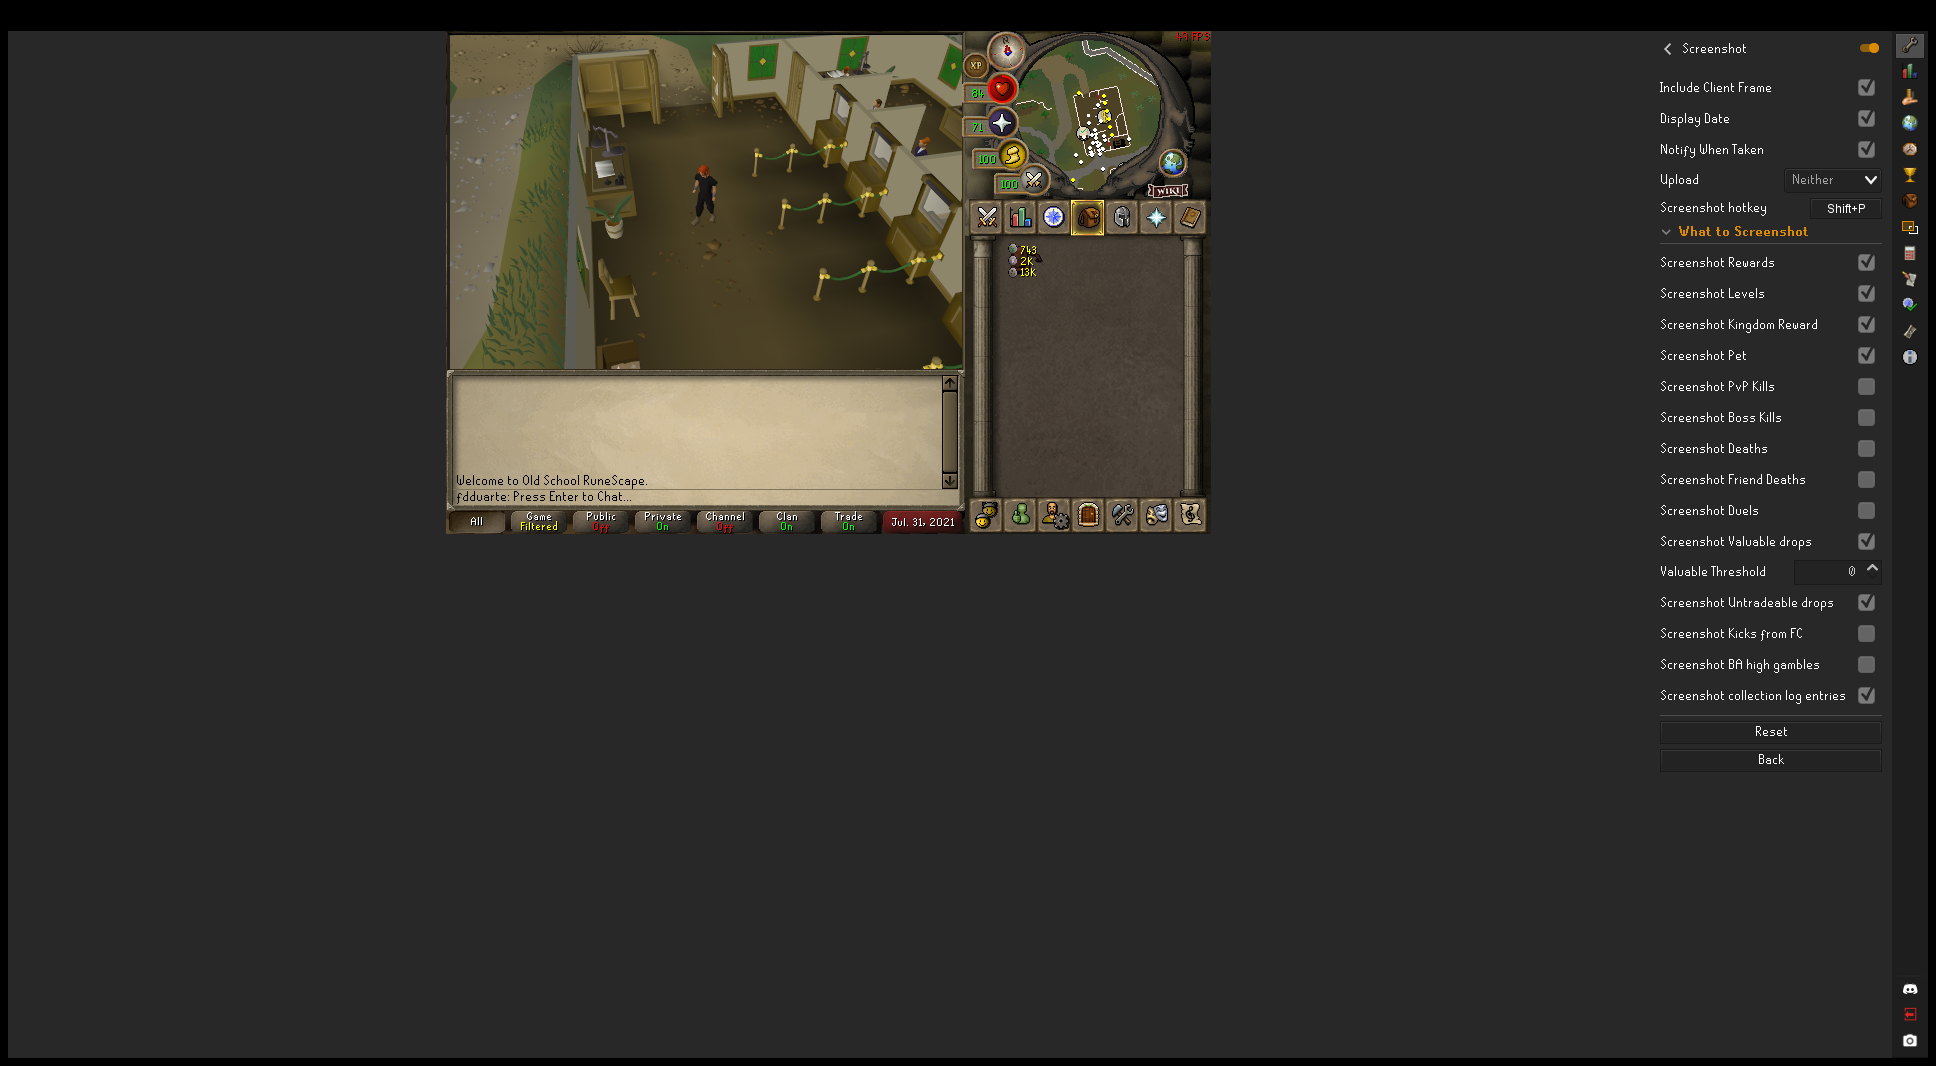

In [39]:
images[0]

We will save just the game screen, without the interface as it is fixed.

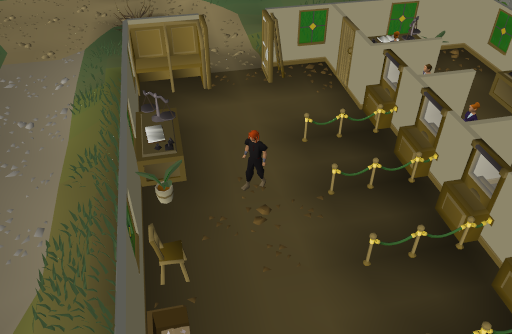

In [84]:
w, h = images[0].size

images[0].crop((450, 35, w - 974, h - 697))

In [85]:
size = (450, 35, w - 974, h - 697)

In [86]:
images = [img.crop(size) for img in images]

In [95]:
img_path_out = os.path.join(root, 'processed')

names = list(range(1, len(images) + 1))
names = [str(name).zfill(5) + '.png' for name in names]

for image, name in zip(images, names):
    image.save(os.path.join(img_path_out, name))